In [1]:
import pandas as pd

### Exercise 1: Display a Pandas Dataframe

In [2]:
vietnam_2019 = pd.read_csv("/Users/binhtran/projects/usth-programming-techniques/labwork2/data/Viet Nam-2019.csv")

print("The number of columns and rows are:")
print(vietnam_2019.shape)

print("The first line of the dataset is:")
print(vietnam_2019.head(1))

# Index the dataframe with column "Age"
vietnam_2019_indexed = vietnam_2019.set_index("Age")

The number of columns and rows are:
(21, 3)
The first line of the dataset is:
   Age        M        F
0  0-4  4166595  3724360


### Exercise 2: Displaying the number of men and women in 2019 and 2020 by Age in Vietnam

In [3]:
vietnam_2019 = pd.read_csv("/Users/binhtran/projects/usth-programming-techniques/labwork2/data/Viet Nam-2019.csv")
vietnam_2020 = pd.read_csv("/Users/binhtran/projects/usth-programming-techniques/labwork2/data/Viet Nam-2020.csv")

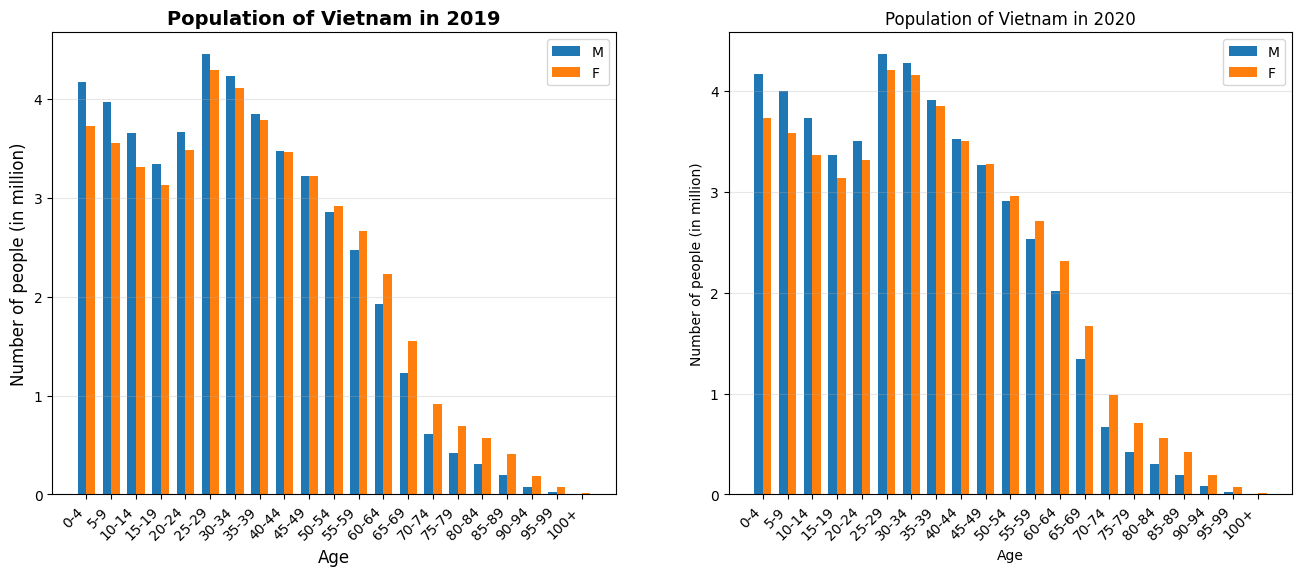

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Get the data
ages = vietnam_2019["Age"]
men_2019 = vietnam_2019["M"]
women_2019 = vietnam_2019["F"]

men_2020 = vietnam_2020["M"]
women_2020 = vietnam_2020["F"]

# Convert to millions 
men_2019_millions = men_2019 / 1_000_000
women_2019_millions = women_2019 / 1_000_000
men_2020_millions = men_2020 / 1_000_000
women_2020_millions = women_2020 / 1_000_000

# Create positions for the bars
x = np.arange(len(ages))
width = 0.35

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 2019 data
ax1.bar(x - width / 2, men_2019_millions, width, label="M")
ax1.bar(x + width / 2, women_2019_millions, width, label="F")
ax1.set_xlabel("Age", fontsize=12)
ax1.set_ylabel("Number of people (in million)", fontsize=12)
ax1.set_title("Population of Vietnam in 2019", fontsize=14, fontweight="bold")
ax1.set_xticks(x)
ax1.set_xticklabels(ages, rotation=45, ha="right")
ax1.legend()
ax1.grid(True, alpha=0.3, axis="y")

# Plot 2020 data
ax2.bar(
    x - width / 2,
    men_2020_millions,
    width,
    label="M",
)
ax2.bar(
    x + width / 2,
    women_2020_millions,
    width,
    label="F",
)
ax2.set_xlabel("Age")
ax2.set_ylabel("Number of people (in million)")
ax2.set_title("Population of Vietnam in 2020")
ax2.set_xticks(x)
ax2.set_xticklabels(ages, rotation=45, ha="right")
ax2.legend()
ax2.grid(True, alpha=0.3, axis="y")

plt.show()

### Exercise 3: Population variation between 2019 and 2020 for each gender
With the files "Viet Nam-2019.csv", "Viet Nam-2019.csv", create a graph wich show the variation of the population by age between 2019 and 2020 for each gender.

You must obtain the following result (the graph is visible in the folder graphs/variation_population_19_20.png in the moodle)

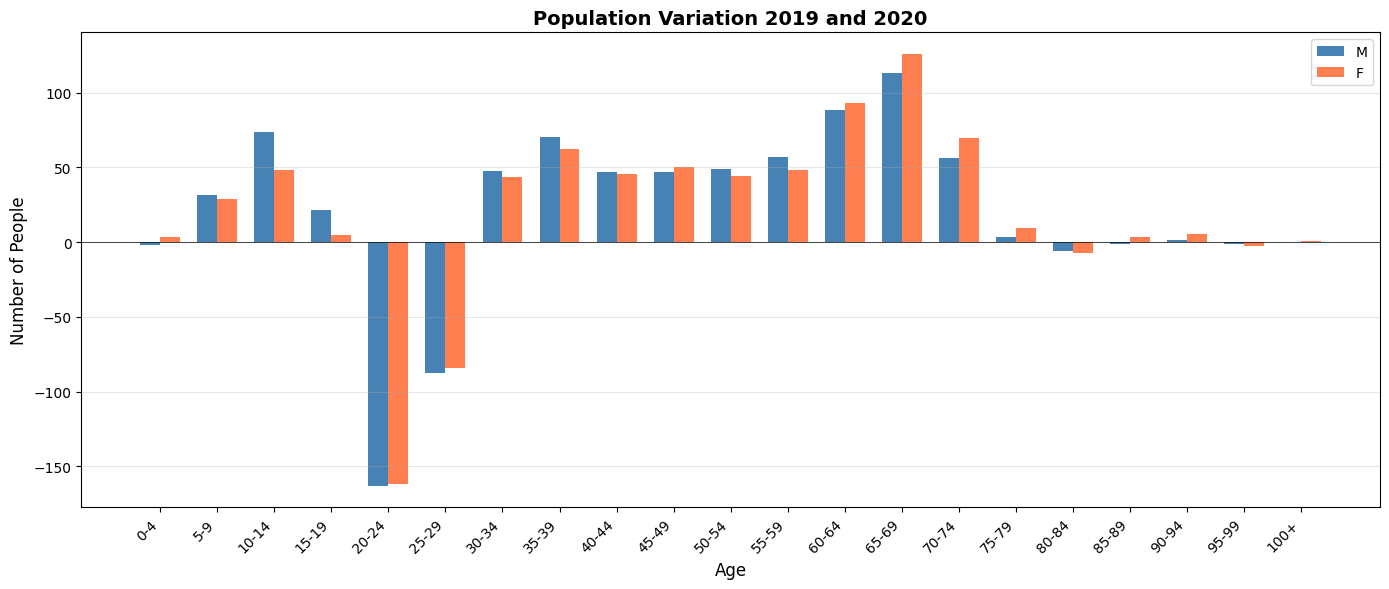

In [5]:
# Calculate the variation (difference) between 2020 and 2019
variation_men = men_2020 - men_2019
variation_women = women_2020 - women_2019

# Convert to thousands for better readability
variation_men_thousands = variation_men / 1000
variation_women_thousands = variation_women / 1000

# Create positions for the bars
x = np.arange(len(ages))
width = 0.35

# Create the figure
fig, ax = plt.subplots(figsize=(14, 6))

# Plot the variation data
ax.bar(x - width / 2, variation_men_thousands, width, label="M", color='steelblue')
ax.bar(x + width / 2, variation_women_thousands, width, label="F", color='coral')

# Customize the plot
ax.set_xlabel("Age", fontsize=12)
ax.set_ylabel("Number of People", fontsize=12)
ax.set_title("Population Variation 2019 and 2020", fontsize=14, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(ages, rotation=45, ha="right")
ax.legend()
ax.grid(True, alpha=0.3, axis="y")
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)  # Add a horizontal line at y=0

plt.tight_layout()
plt.show()

# plt.savefig('graphs/variation_population_19_20.png', dpi=300, bbox_inches='tight')

### Exercise 4: Population variation between 1990 and 2020 for each gender
With the files in the folder datas, create a graph wich show the variation of the population between 1990 and 2020 for each gender.

You must obtain the following result (the graph is visible in the folder graphs/variation_sex.png in the moodle):

In the previous graph, the years are not sorted. Change the previous graph in order to display the years in a sorted way.

You must obtain the following result (the graph is visible in the folder graphs/variation2_sex.png in the moodle):

In [6]:
import os
import glob


def load_population_totals(
    data_folder: str, pattern: str = "Viet Nam-*.csv"
) -> pd.DataFrame:
    """
    Read all CSV files matching pattern in data_folder and return a DataFrame
    with total men, women and total population per year (sorted by year).
    """
    csv_files = glob.glob(os.path.join(data_folder, pattern))

    population_data = {"year": [], "men": [], "women": [], "total": []}

    for file_path in csv_files:
        filename = os.path.basename(file_path)
        try:
            year = int(filename.split("-")[1].split(".")[0])
        except Exception:
            # skip files that don't match the expected pattern
            continue

        df = pd.read_csv(file_path)

        total_men = int(df["M"].sum())
        total_women = int(df["F"].sum())
        total_population = total_men + total_women

        population_data["year"].append(year)
        population_data["men"].append(total_men)
        population_data["women"].append(total_women)
        population_data["total"].append(total_population)

    pop_df = pd.DataFrame(population_data)
    pop_df = pop_df.reset_index(drop=True)
    return pop_df


# call the function and assign to pop_df for reuse later in the notebook
pop_df = load_population_totals(
    "/Users/binhtran/projects/usth-programming-techniques/labwork2/data"
)
pop_df_sorted = pop_df.sort_values(by="year").reset_index(drop=True)

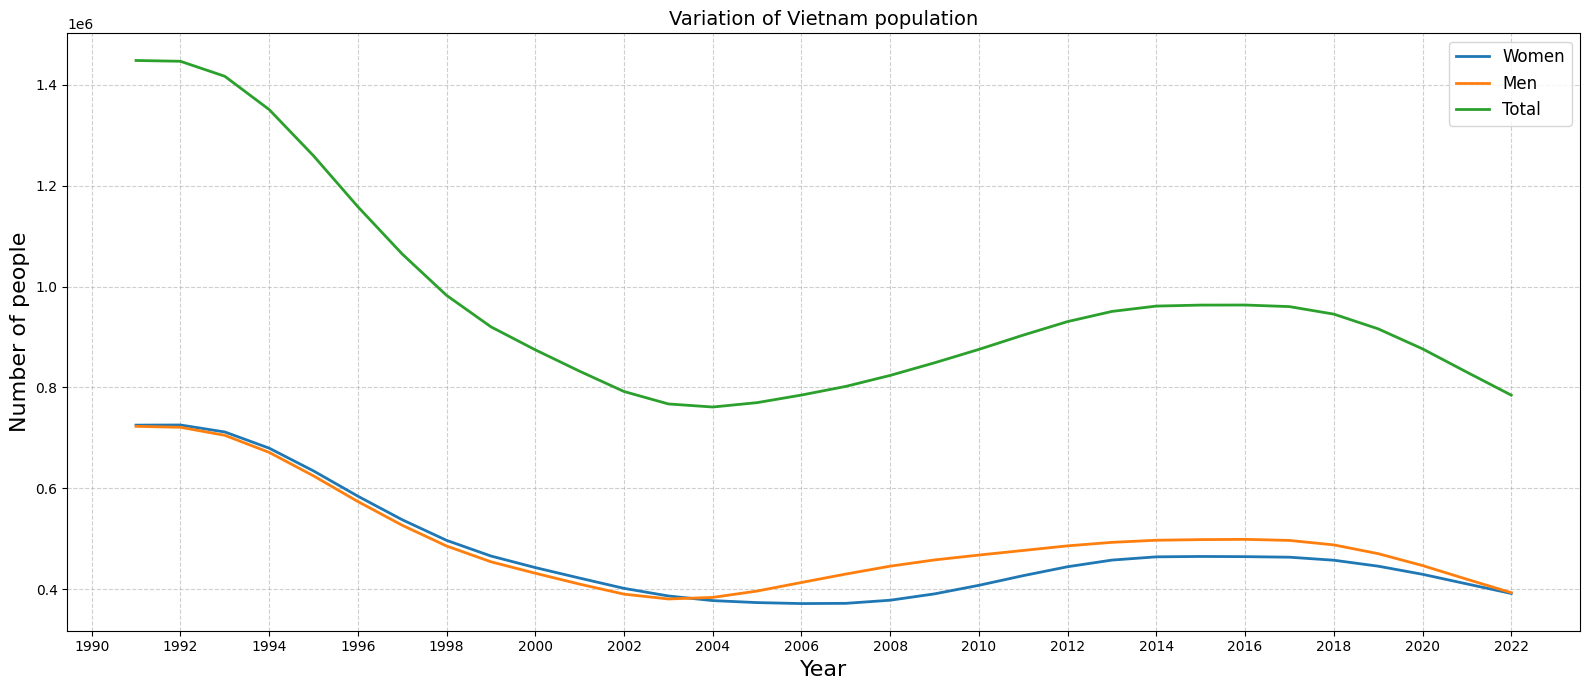

In [7]:
pop_df_sorted["men_diff"] = pop_df_sorted["men"].diff()
pop_df_sorted["women_diff"] = pop_df_sorted["women"].diff()
pop_df_sorted["total_diff"] = pop_df_sorted["total"].diff()

plt.figure(figsize=(16, 7))

plt.plot(pop_df_sorted["year"], pop_df_sorted["women_diff"], label="Women", color='tab:blue', linewidth=2)
plt.plot(pop_df_sorted["year"], pop_df_sorted["men_diff"], label="Men", color='tab:orange', linewidth=2)
plt.plot(pop_df_sorted["year"], pop_df_sorted["total_diff"], label="Total", color='tab:green', linewidth=2)

# --- Labels and formatting ---
plt.title("Variation of Vietnam population", fontsize=14)
plt.xlabel("Year", fontsize=16)
plt.xticks(np.arange(pop_df_sorted["year"].min(), pop_df_sorted["year"].max() + 1, 2))
plt.ylabel("Number of people", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


### Exercise 5: Population variation during a given period by age
With the files in the folder datas, create a graph wich show the variation of the population by age between 1990 and 2020

You must obtain the following result (the graph is visible in the folder graphs/variation_age.png in the moodle)

In [8]:
def load_population_totals(
    data_folder: str, pattern: str = "Viet Nam-*.csv"
) -> pd.DataFrame:
    csv_files = glob.glob(os.path.join(data_folder, pattern))

    df_list = []
    for file_path in csv_files:
        filename = os.path.basename(file_path)
        try:
            _df = pd.read_csv(file_path)
            year = int(filename.split("-")[1].split(".")[0])
            _df["year"] = year
            df_list.append(_df)
        except Exception:
            # skip files that don't match the expected pattern
            continue

    return pd.concat(df_list, ignore_index=True)


pop_df = load_population_totals(
    "/Users/binhtran/projects/usth-programming-techniques/labwork2/data"
)
pop_df = pop_df.sort_values(by="year").reset_index(drop=True)

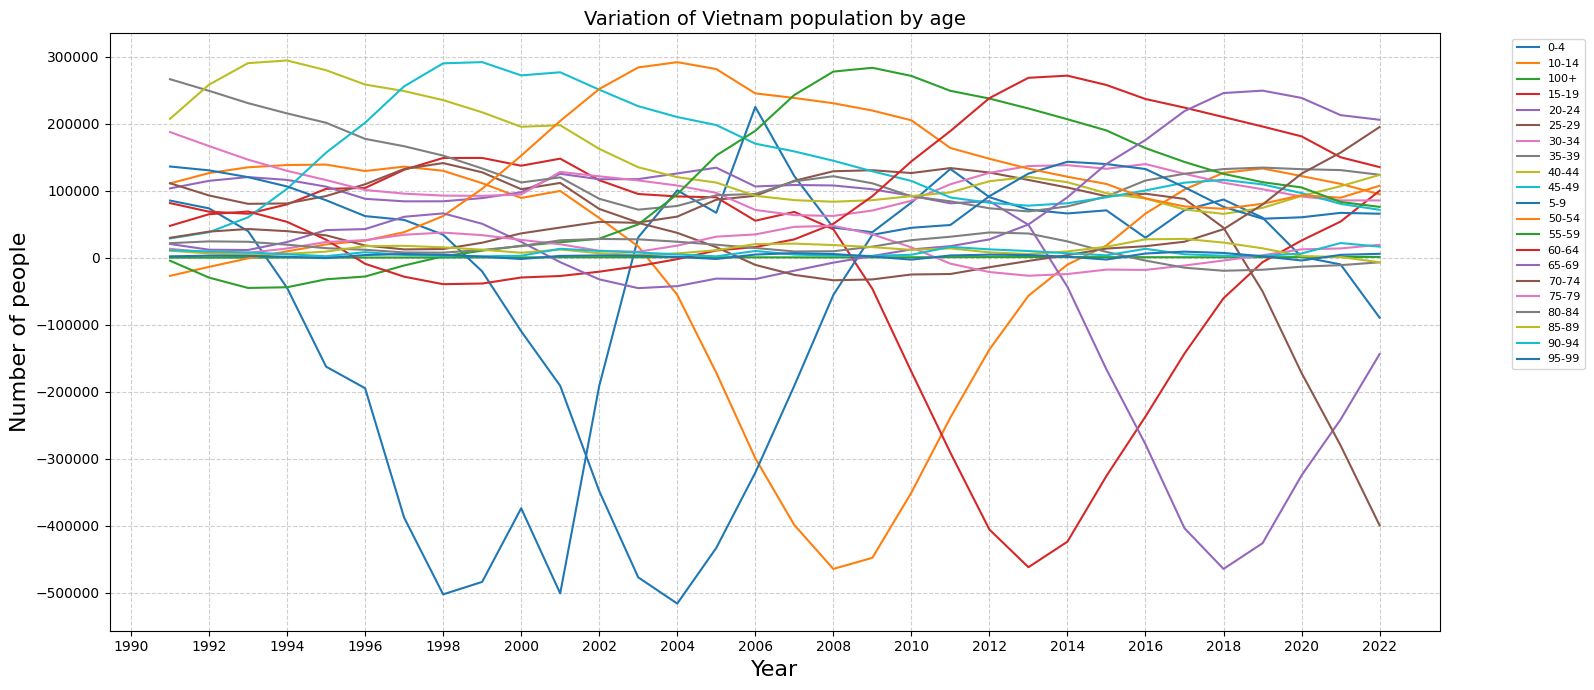

In [9]:
pop_df["Total"] = pop_df["M"] + pop_df["F"]
pop_df = pop_df.sort_values(by=["Age", "year"])
pop_df["Variation"] = pop_df.groupby("Age")["Total"].diff()
plt.figure(figsize=(16, 7))

for age_group, subset in pop_df.groupby("Age"):
    plt.plot(subset["year"], subset["Variation"], label=age_group, linewidth=1.5)

plt.title("Variation of Vietnam population by age", fontsize=14)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Number of people", fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(np.arange(pop_df_sorted["year"].min(), pop_df_sorted["year"].max() + 1, 2))
plt.tight_layout()

plt.show()


### Exercise 6: Population variation during a given period by age group
With the files in the folder datas, create a graph wich show the variation of the population by age group between 1990 and 2020

You must obtain the following result (the graph is visible in the folder graphs/variation_age_group.png in the moodle):

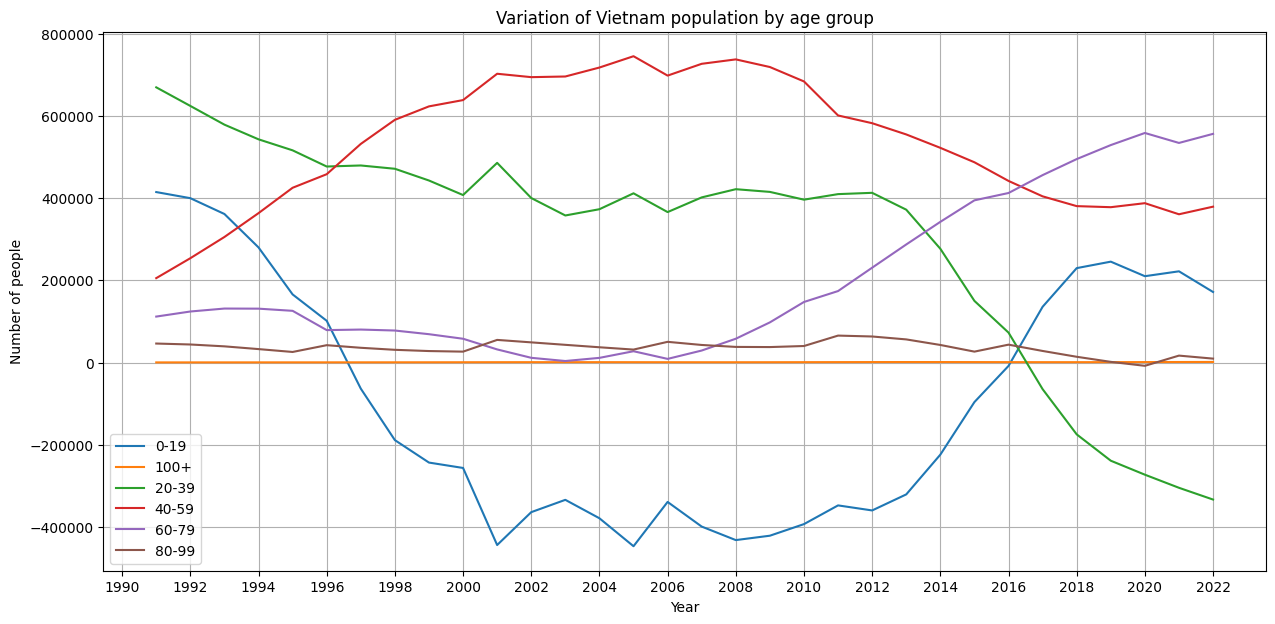

In [10]:
pop_df = load_population_totals(
    "/Users/binhtran/projects/usth-programming-techniques/labwork2/data"
)
pop_df = pop_df.sort_values(by="year").reset_index(drop=True)

pop_df.head(20)

pop_df['Population'] = pop_df['M'] + pop_df['F']

# age group mapping
age_bins = {
    '0-19': ['0-4', '5-9', '10-14', '15-19'],
    '20-39': ['20-24', '25-29', '30-34', '35-39'],
    '40-59': ['40-44', '45-49', '50-54', '55-59'],
    '60-79': ['60-64', '65-69', '70-74', '75-79'],
    '80-99': ['80-84', '85-89', '90-94', '95-99'],
    '100+': ['100+']
}

def map_age_group(age):
    for group, bins in age_bins.items():
        if age in bins:
            return group
    return None

pop_df['AgeGroup'] = pop_df['Age'].apply(map_age_group)

grouped = pop_df.groupby(['year', 'AgeGroup'])['Population'].sum().unstack()

variation = grouped.diff()

plt.figure(figsize=(15,7))
for col in variation.columns:
    plt.plot(variation.index, variation[col], label=col)

plt.title('Variation of Vietnam population by age group')
plt.xlabel('Year')
plt.ylabel('Number of people')
plt.xticks(np.arange(pop_df_sorted["year"].min(), pop_df_sorted["year"].max() + 1, 2))
plt.legend()
plt.grid(True)
plt.show()

